In [31]:
import data_structure as ds
from data_structure import Gender
import numpy as np
import matplotlib.pyplot as plt

men_curr = ds.locate('Peter',
          column='current_salary',
          gender=Gender.Male,
          dataframe=ds.search_all())

female_curr = ds.locate('Peter',
            column='current_salary',
            gender=Gender.Female,
            dataframe=ds.search_all())

np.mean(men_curr), np.mean(female_curr)

INFO:root:Dataframe provided, ignoring user Peter
INFO:root:Locating current_salary for males in all's database
INFO:root:Dataframe provided, ignoring user Peter
INFO:root:Locating current_salary for females in all's database


(87.69047619047619, 85.3157894736842)

In [32]:
men_deserved = ds.locate('Peter',
          column='deserved_salary',
          gender=Gender.Male,
          dataframe=ds.search_all())

female_deserved = ds.locate('Peter',
            column='deserved_salary',
            gender=Gender.Female,
            dataframe=ds.search_all())

np.mean(men_deserved), np.mean(female_deserved)
                         

INFO:root:Dataframe provided, ignoring user Peter
INFO:root:Locating deserved_salary for males in all's database
INFO:root:Dataframe provided, ignoring user Peter
INFO:root:Locating deserved_salary for females in all's database


(105.95238095238095, 102.52631578947368)

In [33]:
df = ds.search_all()
df.groupby('name')[['deserved_salary', 'current_salary']].mean().sort_values('deserved_salary', ascending=False)

,deserved_salary,current_salary
name,,
John,110.500000,92.000000
Richard,109.000000,88.000000
William,108.000000,89.500000
Michael,106.500000,88.000000
Christopher,106.333333,88.833333
Jessica,106.000000,87.000000
Thomas,105.500000,87.000000
Robert,104.500000,86.000000
David,104.000000,86.000000


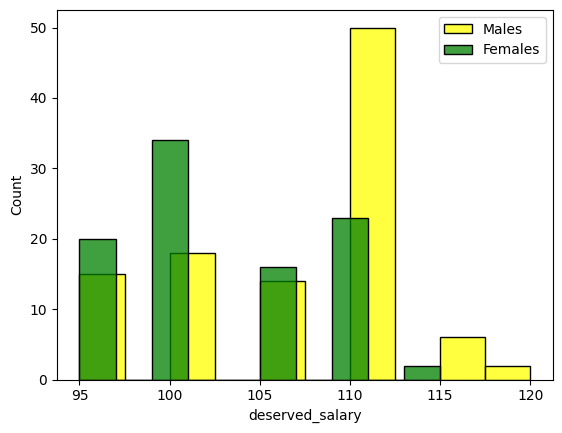

In [34]:
import seaborn as sns

# sns.histplot(data=df.groupby('gender')['deserved_salary'])

m_mask = df['gender'] == Gender.Male
f_mask = df['gender'] == Gender.Female

df_men, df_fem = df[m_mask], df[f_mask]

sns.histplot(data=df[m_mask]['deserved_salary'], color='yellow', bins=10, label='Males')
sns.histplot(data=df[f_mask]['deserved_salary'], color='green', bins=10, label='Females')
plt.legend()

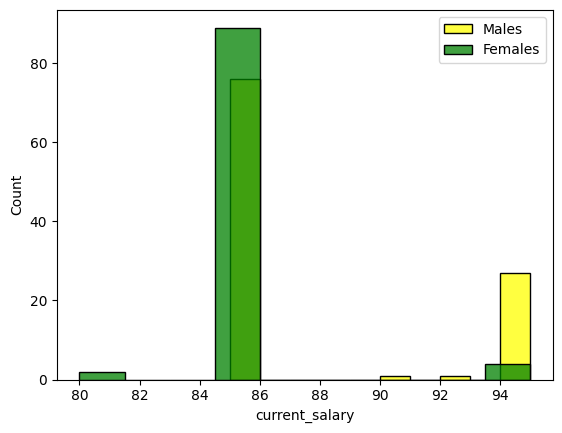

In [35]:
sns.histplot(data=df[m_mask]['current_salary'], color='yellow', bins=10, label='Males')
sns.histplot(data=df[f_mask]['current_salary'], color='green', bins=10, label='Females')
plt.legend()

In [36]:
from scipy.stats import ttest_ind, norm

ttest_ind(df[m_mask]['deserved_salary'], df[f_mask]['deserved_salary'])
ttest_ind(df[m_mask]['current_salary'], df[f_mask]['current_salary'])

TtestResult(statistic=4.756213358809789, pvalue=3.793483062014191e-06, df=198.0)

In [37]:
spooled = np.sqrt(
    (
        ((len(df_men)-1)*df_men['deserved_salary'].std()**2) + 
    ((len(df_fem)-1)*df_fem['deserved_salary'].std()**2)
    ) / (len(df_men) + len(df_fem) - 2)
    )



cohen_d = (df[m_mask]['deserved_salary'].mean() - df[f_mask]['deserved_salary'].mean()) / spooled
cohen_d

0.5682099507168042

In [38]:
import statsmodels.stats.power as smp

effect_size = cohen_d
alpha = 0.01
power = 0.99

nobs1 = smp.tt_ind_solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')
nobs1


150.53482238146546

<AxesSubplot: xlabel='deserved_salary', ylabel='Count'>

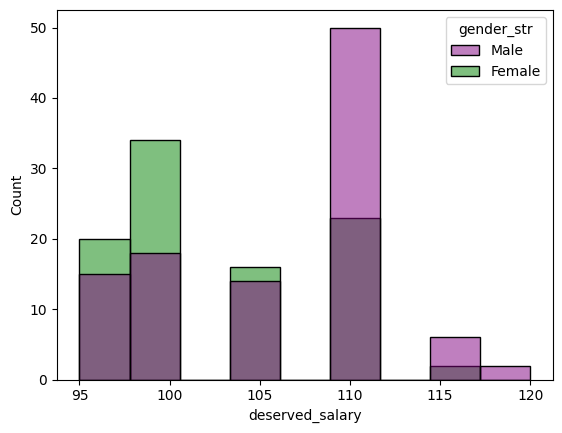

In [39]:
df['gender_str'] = df['gender'].apply(lambda x: x.name)

# Now use 'gender_str' for the 'hue' parameter
sns.histplot(df, x='deserved_salary', hue='gender_str', palette=['purple', 'green'])

In [40]:
chris_des = ds.locate(user='Peter', name='Christopher', column='deserved_salary', dataframe=ds.search_all())
chris_curr = ds.locate(user='Peter', name='Christopher', column='current_salary', dataframe=ds.search_all())

sus_des = ds.locate(user='Peter', name='Susan', column='deserved_salary', dataframe=ds.search_all())
sus_curr = ds.locate(user='Peter', name='Susan', column='current_salary', dataframe=ds.search_all())

INFO:root:Dataframe provided, ignoring user Peter
INFO:root:Locating deserved_salary for Christopher in all's database
INFO:root:Dataframe provided, ignoring user Peter
INFO:root:Locating current_salary for Christopher in all's database
INFO:root:Dataframe provided, ignoring user Peter
INFO:root:Locating deserved_salary for Susan in all's database
INFO:root:Dataframe provided, ignoring user Peter
INFO:root:Locating current_salary for Susan in all's database


Text(0.5, 0, 'Deserved Salary ($1000$ USD)')

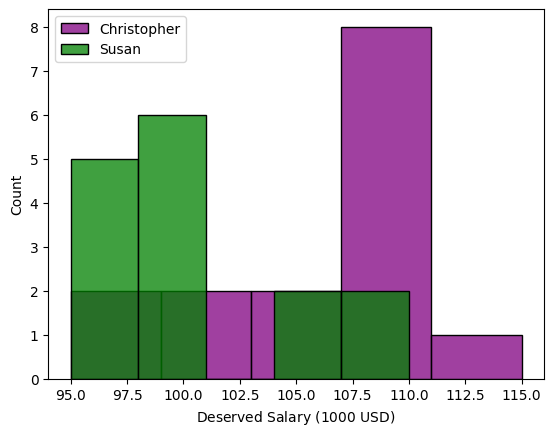

In [41]:
sns.histplot(chris_des, color='purple', label='Christopher')
sns.histplot(sus_des, color='green', label='Susan')
plt.legend()
plt.xlabel('Deserved Salary ($1000$ USD)')

Text(0.5, 0, 'Current Salary ($1000$ USD)')

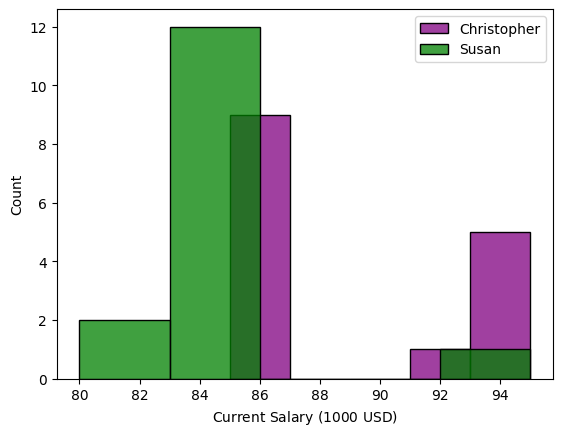

In [42]:
sns.histplot(chris_curr, color='purple', label='Christopher')
sns.histplot(sus_curr, color='green', label='Susan')
plt.legend()
plt.xlabel('Current Salary ($1000$ USD)')

In [43]:
des_res = ttest_ind(chris_des, sus_des, alternative='two-sided')
curr_res = ttest_ind(chris_curr, sus_curr, alternative='two-sided')
des_res.pvalue, curr_res.pvalue

(0.007119078375420199, 0.017707037405595368)

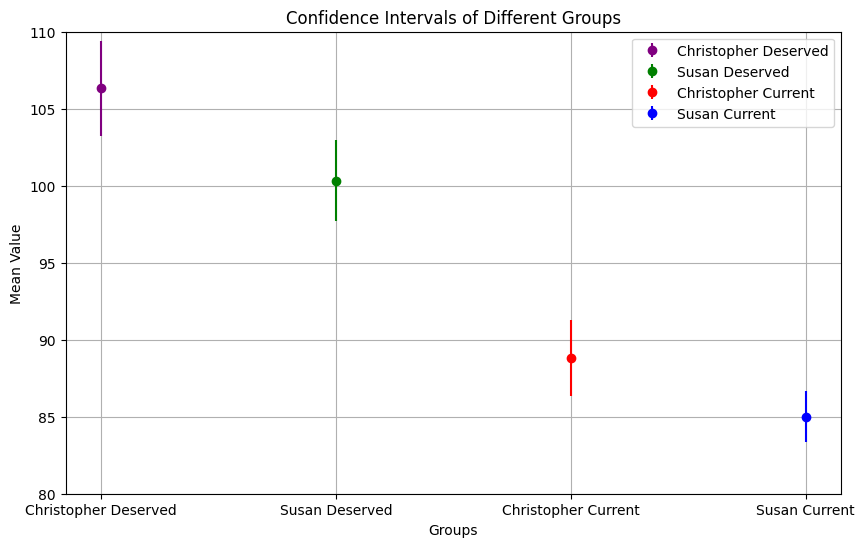

In [44]:
import scipy.stats as stats
# Calculate confidence intervals
conf_int1 = norm.interval(0.95, loc=np.mean(chris_des), scale=stats.sem(chris_des))
conf_int2 = norm.interval(0.95, loc=np.mean(sus_des), scale=stats.sem(sus_des))
conf_int3 = norm.interval(0.95, loc=np.mean(chris_curr), scale=stats.sem(chris_curr))
conf_int4 = norm.interval(0.95, loc=np.mean(sus_curr), scale=stats.sem(sus_curr))

# Plotting confidence intervals
plt.figure(figsize=(10, 6))

# Plot first set of confidence intervals
plt.errorbar(x=1, y=np.mean(chris_des), yerr=np.mean(chris_des)-conf_int1[0], fmt='o', label='Christopher Deserved',
             color='purple')
plt.errorbar(x=2, y=np.mean(sus_des), yerr=np.mean(sus_des)-conf_int2[0], fmt='o', label='Susan Deserved',
             color='green')

# Plot second set of confidence intervals
plt.errorbar(x=3, y=np.mean(chris_curr), yerr=np.mean(chris_curr)-conf_int3[0], fmt='o', label='Christopher Current',
             color='red')
plt.errorbar(x=4, y=np.mean(sus_curr), yerr=np.mean(sus_curr)-conf_int4[0], fmt='o', label='Susan Current',
             color='blue')

# Customizing the plot
plt.xticks([1, 2, 3, 4], ['Christopher Deserved', 'Susan Deserved', 'Christopher Current', 'Susan Current'])
plt.xlabel('Groups')
plt.ylabel('Mean Value')
plt.title('Confidence Intervals of Different Groups')
plt.legend()
plt.grid()
plt.ylim(80,110)

plt.show()